# Try this exercise

## Problem 1

It is said that the non-parametric Spearman Rank test is "efficient", by which it is meant that when the Spearman Rank test is run on gaussian distributed data, it performs as well as the Pearson's correlation coefficient.  More specifically, if you run the Spearman rank correlation on a set of data, and you run the Pearson's test on the same set of data, the Spearman test will yield the same level of significance as the Pearson's test some large fraction $X$ of the time.

Your job in this problem is to design a numerical experiment to test this statement and to evaluate $X$.  
 (Efficiency: what fraction of time do methods yield probability as low or lower than)

### $\textit{Answer:}$
To evaluate the preformance of these two metrics, we'll generate multiple Bi-variate Gaussian data-sets and preform both the Spearman and Pearson tests on each. After each test, we'll determie the p-value for the tests and then compare them 

In [2]:
# Standard Python initilization 

%pylab inline
import numpy as np
import scipy.stats

fontsize = 20
figsize = (10,6)

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We'll start by comparing Peraoson and Spearman for just the bivariate gausissian distribution from class:

In [43]:
mean = (3,2)
cov = [[1.5, 0], [0,4]]
rng = np.random.default_rng()
x = rng.multivariate_normal(mean, cov, size=10000)

Pearson Coefficient:-0.011740712781992565
P-value:0.24040905743744453
Spearman Coefficient:-0.011419819842198198
P-value:0.2535053752288411


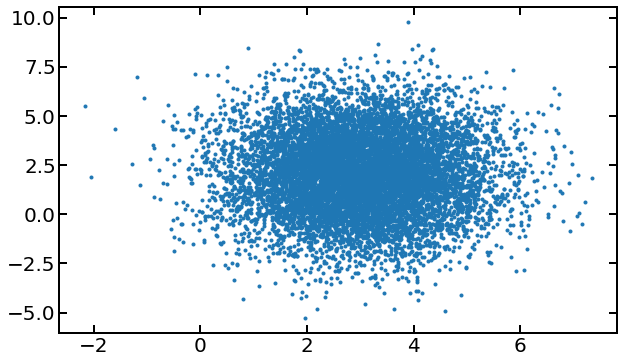

In [45]:

plt.plot(x[:,0],x[:,1],'.')

print('Pearson Coefficient:' + str((scipy.stats.pearsonr(x[:,0],x[:,1])[0])))
print('P-value:'+ str((scipy.stats.pearsonr(x[:,0],x[:,1])[1]))) #out:(r, probability)

print('Spearman Coefficient:' + str(scipy.stats.spearmanr(x[:,0],x[:,1])[0]))
print('P-value:' + str(scipy.stats.spearmanr(x[:,0],x[:,1])[1])) #out:(r, probability)


In [46]:
# Compute percent difference
def percent_diff(p1,p2):
    return np.abs((p1-p2)/((p1+p2)/2)*100)

percent_diff(scipy.stats.spearmanr(x[:,0],x[:,1])[1],scipy.stats.pearsonr(x[:,0],x[:,1])[1])

5.303071514107834

In [90]:
num_tests = 5000

spearman = np.zeros(shape = (2,num_tests))


pearson = np.zeros(shape = (2,num_tests))


for i in range(0,num_tests):
    mean = (3,2)
    cov = [[1.5, 0], [0,2]] 
    rng = np.random.default_rng()
    x = rng.multivariate_normal(mean, cov, size=10000)
    
    # Save tests to arrays
    spearman[0][i] = scipy.stats.spearmanr(x[:,0],x[:,1])[0] # r-vals
    spearman[1][i] = scipy.stats.spearmanr(x[:,0],x[:,1])[1] # p-vals
    
    pearson[0][i] = scipy.stats.pearsonr(x[:,0],x[:,1])[0] # r=vals
    pearson[1][i] = scipy.stats.pearsonr(x[:,0],x[:,1])[1] # p-vals


In [91]:
# Calculate the percent differnce for the p-values
frac = percent_diff(spearman[1],pearson[1])

# Select instances where difference within 10%
here = np.where(frac <= 15)

diff = len(here[0]) / len(frac)
print('For ' + str(num_tests) +  ' tests, the p-values for Pearson and Spearman are within 15% of each other '+str(diff*100) + '% of the time.')

For 5000 tests, the p-values for Pearson and Spearman are within 10% of each other 34.94% of the time.


So for 5000 tests, the p-values for the Pearson and Spearman Rank Tests were within 10% of each other less than 25% of the time. This does not sound like a large fraction but at least shows they are somewhat consistent. Alternatively, the problem defines the efficinecy as the fraction of times a method yields a probability as low as or lower than other. Let's evaluate this quantity: 

______________________________________________________________________________________________________________________

In [86]:
here2 = np.where(spearman[1] <= pearson[1])

efficiency = len(here2[0]) / len(frac)
print('For ' + str(num_tests) +  ' tests, the p-values for Spearman were lower than or equal those from Pearson '+str(efficiency*100) + '% of the time.')


For 5000 tests, the p-values for Spearman were lower than or equal those from Pearson 49.36% of the time.


## Problem 2

Do the same experiment for the Kendall's Tau.

### $\textit{Answer:}$

We'll repeat the same numerical experiment as above, only this time comparing Kendall's Tau to Pearson:

In [92]:
num_tests = 5000

kendall = np.zeros(shape = (2,num_tests))


pearson = np.zeros(shape = (2,num_tests))


for i in range(0,num_tests):
    mean = (3,2)
    cov = [[1.5, 0], [0,2]] 
    rng = np.random.default_rng()
    x = rng.multivariate_normal(mean, cov, size=10000)
    
    # Save tests to arrays
    kendall[0][i] = scipy.stats.spearmanr(x[:,0],x[:,1])[0] # r-vals
    kendall[1][i] = scipy.stats.spearmanr(x[:,0],x[:,1])[1] # p-vals
    
    pearson[0][i] = scipy.stats.pearsonr(x[:,0],x[:,1])[0] # r=vals
    pearson[1][i] = scipy.stats.pearsonr(x[:,0],x[:,1])[1] # p-vals

In [89]:
# Calculate the percent differnce for the p-values
frac = percent_diff(kendall[1],pearson[1])

# Select instances where difference within 10%
here = np.where(frac <= 10)
diff = len(here[0]) / len(frac)

# Evalue 'efficiency'
here2 = np.where(kendall[1] <= pearson[1])
efficiency = len(here2[0]) / len(frac)
print('For ' + str(num_tests) +  ' tests, the p-values for Kendall were lower than or equal those from Pearson '+str(efficiency*100) + '% of the time.')
print('For ' + str(num_tests) +  ' tests, the p-values for Pearson and Kendall are within 15% of each other '+str(diff*100) + '% of the time.')

For 5000 tests, the p-values for Spearman were lower than or equal those from Pearson 50.519999999999996% of the time.
For 5000 tests, the p-values for Pearson and Spearman are within 10% of each other 24.42% of the time.
